# Cross-sectional Example

This notebooks demonstrates how DataComp methods for a cross-sectional comparison can be applied. 
The underlying data was simulated using another notebook ([simulate_data.ipynb](https://github.com/Cojabi/DataComp_Examples/blob/master/data/simulate_data.ipynb)).

Further explanations on how to interpret results are given in the [documentation](https://datacomp.readthedocs.io/en/latest/interpretation.html).
The interpretation of the comparison results depends strongly on the underlying data and the domain of interest. A more thorough example on real world data is going to be published in the future. 

# Imports

In [1]:
import datacomp as dc

# Data setup

In [2]:
# load Data
datacol = dc.get_data("data/simulated.csv", ["Dataset1", "Dataset2", "Dataset3"], 
                      ["CATSIG1", "CATNON2", "CATDICHO", "NAN1"],
                      "DATASET")

# compare only baseline data
datacol.reduce_dfs_to_value("TIME", 0)

# exlude following features from comparison
exclude_feats = ["TIME", "DATASET", "ENTITY"]

# Evaluate the feature overlap

The following analysis will show how many features are overlapping between which of the datasets contained in the DataCollection.

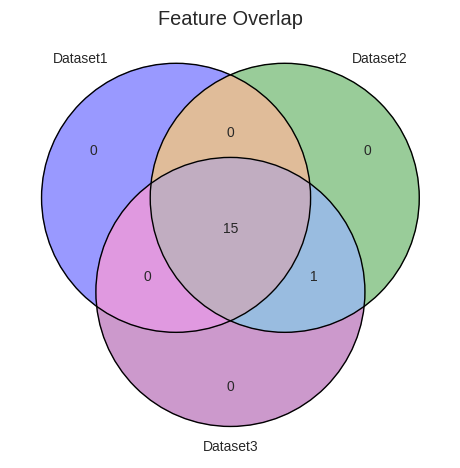

In [3]:
datacol.feature_overlap()

The common and distinct features can be selected using simple functions.

The distinct features are given as a dictionary which has the dataset numbers (representing the order in which they appeas in the DataCollection) as keys that point towards a set of feature names that does differ between the respective datasets.

e.g.: (0, 1): {'NAN1'}
The feature 'NAN1' is not overlapping between dataset1 and 2.

In [4]:
# listing the common features
print("Common features:")
print(datacol.get_common_features())

# listing the distinct features
print("\nDistinct features:")
print(datacol.get_feature_differences())

Common features:
['FEAT1', 'BATCH2', 'BATCH1', 'DATASET', 'NDNON2', 'NDNON1', 'NDSIG1', 'NDSIG2', 'CATSIG1', 'CATNON2', 'CATDICHO', 'LONG1', 'TIME', 'ENTITY', 'CHIFEAT']

Distinct features:
{(0, 1): {'NAN1'}, (1, 2): set(), (0, 2): {'NAN1'}}


# Statistical comparison

This analysis aims to identify features which are significantly deviating between the datasets. Statistical tests will be performed and the results will be shown in a table. Further information on how to read the resulting table are given in the official documentation. 

In [5]:
# sorting by index because by default the resulting dataframe will be sorted 
# based on signficance. This can be hard to read if multiple datasets are 
# involved
results = datacol.analyze_feature_ranges(exclude=exclude_feats).sort_index()
results

Fraction of significant comparisons: 23/36
Fraction of mean diff. confidence intervals without '0': 10/36


cor_p-value  signf         mean_diff diff_flag  \
features datasets                                                    
BATCH1   (1, 2)    4.763399e-01  False     [-3.09, 2.47]     False   
         (1, 3)    0.000000e+00   True    [-7.87, -2.57]      True   
         (2, 3)    0.000000e+00   True    [-7.57, -2.26]      True   
BATCH2   (1, 2)    3.544151e-01  False     [-2.92, 2.63]     False   
         (1, 3)    0.000000e+00   True     [-4.63, 0.67]     False   
         (2, 3)    0.000000e+00   True     [-4.49, 0.82]     False   
CATDICHO (1, 2)    9.550464e-01  False               NaN       NaN   
         (1, 3)    5.920554e-04   True               NaN       NaN   
         (2, 3)    1.756957e-03   True               NaN       NaN   
CATNON2  (1, 2)    9.550464e-01  False               NaN       NaN   
         (1, 3)    2.920551e-02   True               NaN       NaN   
         (2, 3)    1.869844e-02   True               NaN       NaN   
CATSIG1  (1, 2)    0.000000e+00   True               NaN       NaN   
         (1, 3)    0.000000e+00   True               NaN       NaN   
         (2, 3)    0.000000e+00   True               NaN       NaN   
CHIFEAT  (1, 2)    1.550032e-07   True     [-3.72, 1.83]     False   
         (1, 3)    0.000000e+00   True     [-4.82, 0.49]     False   
         (2, 3)    6.981874e-06   True     [-3.87, 1.43]     False   
FEAT1    (1, 2)    7.395170e-04   True  [-41.27, -36.99]      True   
         (1, 3)    2.475356e-07   True  [-58.62, -54.57]      True   
         (2, 3)    5.419654e-01  False  [-19.59, -15.34]      True   
LONG1    (1, 2)    6.876156e-02  False      [-4.0, 1.56]     False   
         (1, 3)    4.763399e-01  False     [-1.89, 3.42]     False   
         (2, 3)    1.146254e-04   True     [-0.67, 4.64]     False   
NDNON1   (1, 2)    3.932549e-01  False     [-2.58, 2.98]     False   
         (1, 3)    8.014434e-01  False     [-2.55, 2.76]     False   
         (2, 3)    9.446553e-01  False     [-2.75, 2.56]     False   
NDNON2   (1, 2)    3.932549e-01  False     [-3.67, 1.89]     False   
         (1, 3)    9.550464e-01  False     [-2.76, 2.55]     False   
         (2, 3)    5.419654e-01  False     [-1.87, 3.44]     False   
NDSIG1   (1, 2)    0.000000e+00   True     [-5.31, 0.25]     False   
         (1, 3)    0.000000e+00   True    [-8.97, -3.66]      True   
         (2, 3)    0.000000e+00   True    [-6.44, -1.13]      True   
NDSIG2   (1, 2)    0.000000e+00   True   [-12.55, -6.99]      True   
         (1, 3)    0.000000e+00   True  [-22.85, -17.54]      True   
         (2, 3)    0.000000e+00   True   [-13.07, -7.77]      True   

                     Dataset1conf.     Dataset2conf.     Dataset3conf.  \
features datasets                                                        
BATCH1   (1, 2)     [19.58, 20.14]     [20.04, 20.3]    [24.93, 25.24]   
         (1, 3)     [19.58, 20.14]     [20.04, 20.3]    [24.93, 25.24]   
         (2, 3)     [19.58, 20.14]     [20.04, 20.3]    [24.93, 25.24]   
BATCH2   (1, 2)      [19.8, 20.05]     [19.94, 20.2]    [21.76, 22.04]   
         (1, 3)      [19.8, 20.05]     [19.94, 20.2]    [21.76, 22.04]   
         (2, 3)      [19.8, 20.05]     [19.94, 20.2]    [21.76, 22.04]   
CATDICHO (1, 2)                NaN               NaN               NaN   
         (1, 3)                NaN               NaN               NaN   
         (2, 3)                NaN               NaN               NaN   
CATNON2  (1, 2)                NaN               NaN               NaN   
         (1, 3)                NaN               NaN               NaN   
         (2, 3)                NaN               NaN               NaN   
CATSIG1  (1, 2)                NaN               NaN               NaN   
         (1, 3)                NaN               NaN               NaN   
         (2, 3)                NaN               NaN               NaN   
CHIFEAT  (1, 2)       [1.59, 2.07]      [2.48, 3.07]       [3.59, 4.4]   
         (1, 3)       [1.59

In [6]:
print(results.to_latex())

\begin{tabular}{llrllllllrrr}
\toprule
       &        &   cor\_p-value &  signf &         mean\_diff & diff\_flag &    Dataset1conf. &     Dataset2conf. &     Dataset3conf. &  Dataset1 &  Dataset2 &  Dataset3 \\
features & datasets &               &        &                   &           &                  &                   &                   &           &           &           \\
\midrule
BATCH1 & (1, 2) &  4.763399e-01 &  False &     [-3.09, 2.47] &     False &   [19.58, 20.14] &     [20.04, 20.3] &    [24.93, 25.24] &       240 &       240 &       198 \\
       & (1, 3) &  0.000000e+00 &   True &    [-7.87, -2.57] &      True &   [19.58, 20.14] &     [20.04, 20.3] &    [24.93, 25.24] &       240 &       240 &       198 \\
       & (2, 3) &  0.000000e+00 &   True &    [-7.57, -2.26] &      True &   [19.58, 20.14] &     [20.04, 20.3] &    [24.93, 25.24] &       240 &       240 &       198 \\
BATCH2 & (1, 2) &  3.544151e-01 &  False &     [-2.92, 2.63] &     False &    [19.8, 20.05

# Visualization of significant deviations

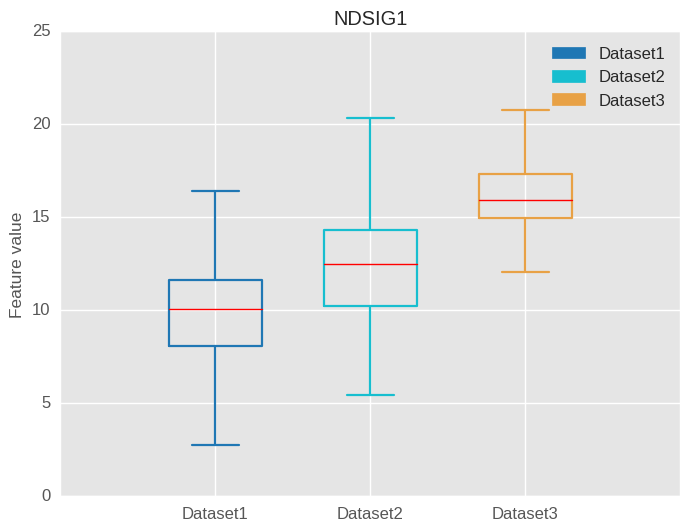

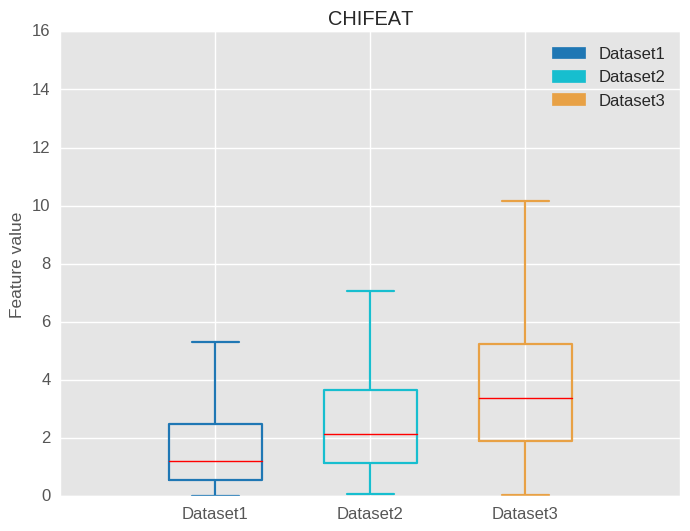

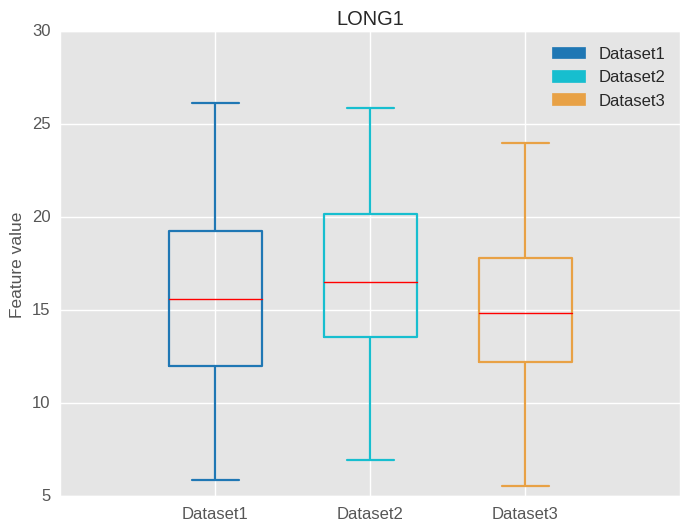

In [7]:
dc.plot_sig_num_feats(datacol, results, feat_subset=["CHIFEAT", "NDSIG1", "LONG1"], kdeplot=False)

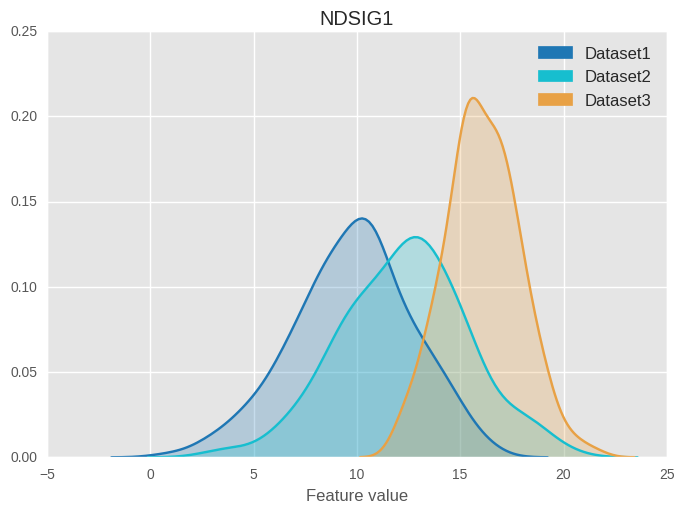

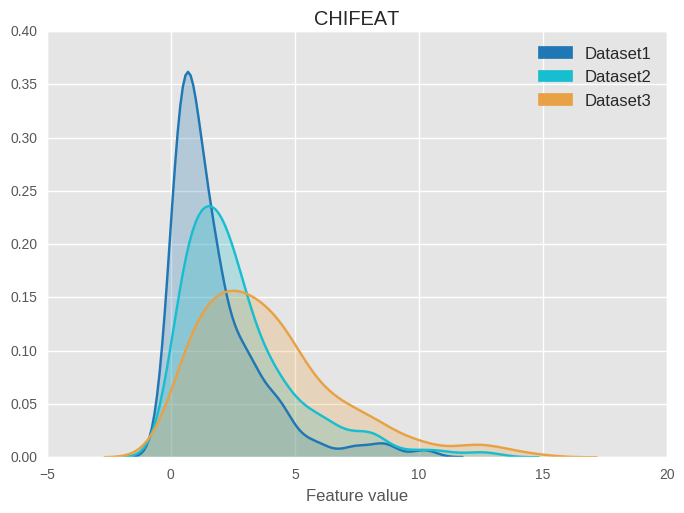

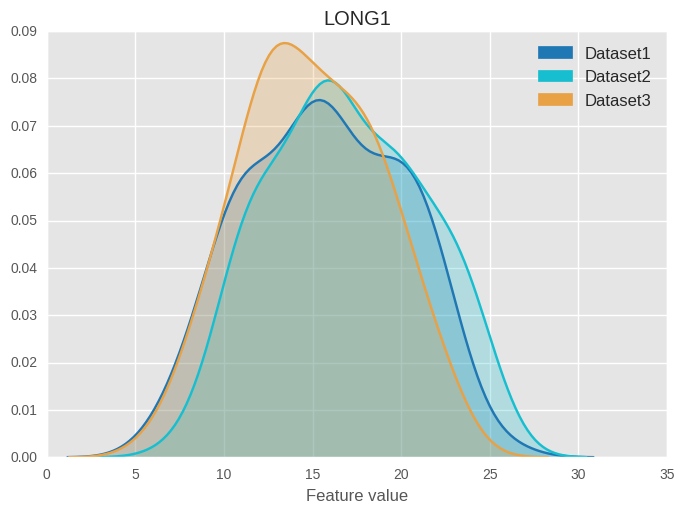

In [8]:
dc.plot_sig_num_feats(datacol, results, feat_subset=["CHIFEAT", "NDSIG1", "LONG1"], boxplot=False)

# Clustering

In [9]:
# columns storing strings; for clustering
str_cols=["CATSIG1"]

# applying the clustering
purity, confusion_m, sig = datacol.hierarchical_clustering(str_cols=str_cols)

# reporting results
print()
print("Cluster purity:", purity)
print("P-value of chi²-test:", sig)
confusion_m

Entries pre incomplete case exclusion: 678
Entries post incomplete case exclusion: 438

Cluster purity: 0.561643835616
P-value of chi²-test: 0.0545328771954


,0,1,2
2,94,115,31
3,100,75,23


# MANOVA

In [10]:
dc.manova(datacol, "DATASET", ["NDNON1", "NDNON2", "BATCH2"])

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Multivariate linear model
==================================================================
                                                                  
-------------------------------------------------------------------
         DATASET          Value   Num DF   Den DF   F Value  Pr > F
-------------------------------------------------------------------
           Wilks' lambda  0.8707  3.0000  674.0000  33.3777  0.0000
          Pillai's trace  0.1293  3.0000  674.0000  33.3777  0.0000
  Hotelling-Lawley trace  0.1486  3.0000  674.0000  33.3777  0.0000
     Roy's greatest root  0.1486  3.0000  674.0000  33.3777  0.0000
------------------------------------------------------------------
                                                                  
------------------------------------------------------------------
       Intercept         Value   Num DF  Den DF   F Value   Pr > F
------------------------------------------------------------------
          Wilks' lambda   0.0037 3.0000 674.0000 59737.8239 0.0000
         Pillai's trace   0.9963 3.0000 674.0000 59737.8239 0.0000
 Hotelling-Lawley trace 265.8954 3.0000 674.0000 59737.8239 0.0000
    Roy's greatest root 265.8954 3.0000 674.0000 59737.8239 0.0000
==================================================================

"""